<a href="https://colab.research.google.com/github/RamyaGuru/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/AtomVisionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example to run [AtomVision](https://github.com/usnistgov/atomvision)

AtomVision is a deep learning package to perform various operations on image data including segmentation and classification of images. 

# Table of Contents
1. Install [AtomVision](https://github.com/usnistgov/atomvision) package
2. Train DenseNet classification model on JARVIS-DFT 2D STEM image dataset
3. Plot example images from each heuristic image class

# Get the repository and install

In [6]:
!rm -rf atomvision
import os
!git clone https://github.com/usnistgov/atomvision.git
os.chdir('atomvision')
!git checkout aims
!python setup.py develop

Cloning into 'atomvision'...
remote: Enumerating objects: 1493, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 1493 (delta 15), reused 23 (delta 8), pack-reused 1453
Receiving objects: 100% (1493/1493), 191.09 MiB | 22.58 MiB/s, done.
Resolving deltas: 100% (221/221), done.
Branch 'aims' set up to track remote branch 'aims' from 'origin'.
Switched to a new branch 'aims'
running develop
running egg_info
creating atomvision.egg-info
writing atomvision.egg-info/PKG-INFO
writing dependency_links to atomvision.egg-info/dependency_links.txt
writing requirements to atomvision.egg-info/requires.txt
writing top-level names to atomvision.egg-info/top_level.txt
writing manifest file 'atomvision.egg-info/SOURCES.txt'
adding license file 'LICENSE.md'
writing manifest file 'atomvision.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/atomvision.egg-link (link to .)
Removing atomvision 2021.10.11

In [25]:
!python --version

Python 3.7.13


# Train DenseNet pretrained model on JARVIS-DFT 2D materials' STEM images generated with convolution approximation

Datasets can be generated with STM/STEM sections of the data folder with generate_data.py script or pre-populated image datasets can be downloaded with 'download.py`. We create two folders ``train_folder``, ``test_folder`` with sub-folders ``0,1,2,3,4,...`` for individual classes and they contain images for these classes such that the train-test splits have proportionate amount of images. An example for using pre-trained densenet on STEM JARVIS-DFT 2D dataset is given below. Change ``train_folder`` and ``test_folder`` paths in order to use a different dataset.

NOTE: having trouble changing number of epochs. Seems to be reading as a string.

In [17]:
!python atomvision/scripts/train_classifiers.py --model_name densenet --epochs 15 --train_folder atomvision/data/classification/stem_jv2d/train_folder --test_folder atomvision/data/classification/stem_jv2d/test_folder


Training Results - Epoch: 1  Avg accuracy: 48.20 Avg loss: 21.55
Validation Results - Epoch: 1  Avg accuracy: 48.39 Avg loss: 25.02
Training Results - Epoch: 2  Avg accuracy: 56.81 Avg loss: 2.12
Validation Results - Epoch: 2  Avg accuracy: 50.23 Avg loss: 2.46
Training Results - Epoch: 3  Avg accuracy: 65.66 Avg loss: 0.99
Validation Results - Epoch: 3  Avg accuracy: 65.90 Avg loss: 0.94
Training Results - Epoch: 4  Avg accuracy: 71.25 Avg loss: 0.78
Validation Results - Epoch: 4  Avg accuracy: 68.66 Avg loss: 0.84
Training Results - Epoch: 5  Avg accuracy: 68.68 Avg loss: 0.80
Validation Results - Epoch: 5  Avg accuracy: 67.28 Avg loss: 0.82
Training Results - Epoch: 6  Avg accuracy: 68.68 Avg loss: 0.88
Validation Results - Epoch: 6  Avg accuracy: 66.36 Avg loss: 0.95
Training Results - Epoch: 7  Avg accuracy: 78.81 Avg loss: 0.64
Validation Results - Epoch: 7  Avg accuracy: 74.65 Avg loss: 0.75
Training Results - Epoch: 8  Avg accuracy: 73.69 Avg loss: 0.99
Validation Results - Epo

# Example Plots in Each Heuristic Image Class

The convolutional neural network classifies the structures into 5 categories. Here, we print out example images from each category to look at their shared characteristics. Each image is labelled here with its composition and space group.

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from IPython.display import display, HTML

#List the class sub-folders generated by the neural network
test_folder = "atomvision/data/classification/stem_jv2d/test_folder/"

os.listdir(test_folder)

['4', '2', '1', '3', '0']

In [10]:
!pip list

Package                       Version                        Location
----------------------------- ------------------------------ -------------------
absl-py                       1.1.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
atomvision                    2021.10.11                     /content/atomvision
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.10.2
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.0
blis                          0.7.7
bokeh  

In [13]:
#Show any output files that have been generated
!ls

Acc.png		     CM.png	    Loss.png		 README.md
atomvision	     CODEMETA.yaml  output_output_27.pt  setup.py
atomvision.egg-info  LICENSE.md     output_output_54.pt


**Accuracy versus Training Epochs**

The classification accuracy is calculated from the relative number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN). 

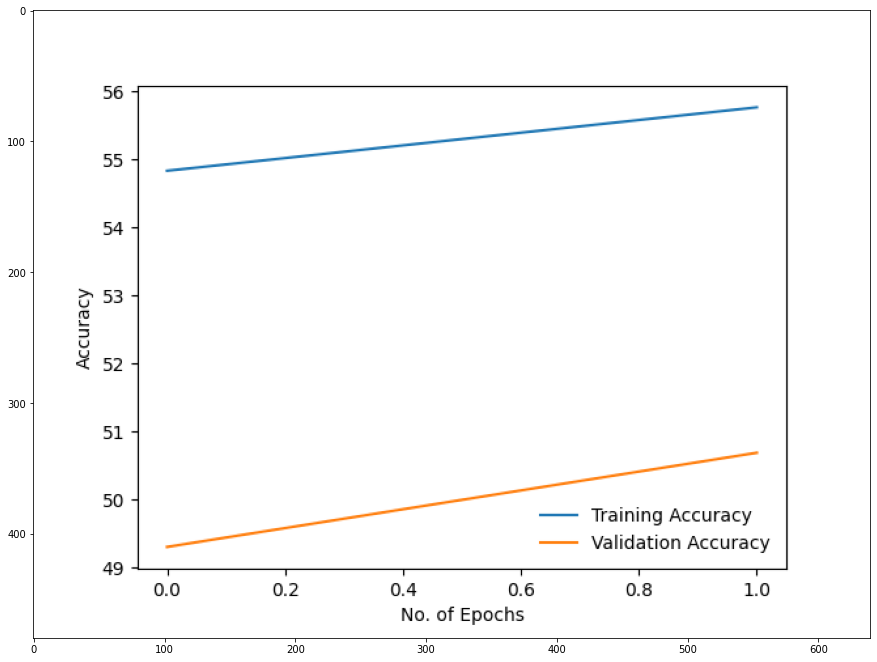

In [14]:
import matplotlib.image as mpimg
plt.figure(figsize = (8,8))
img = mpimg.imread('Acc.png')
imgplot = plt.imshow(img)

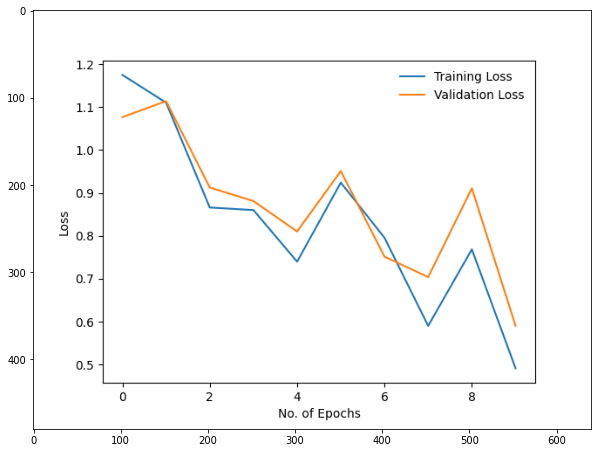

In [23]:
plt.figure(figsize = (8,8))
img = mpimg.imread('Loss.png')
imgplot = plt.imshow(img)

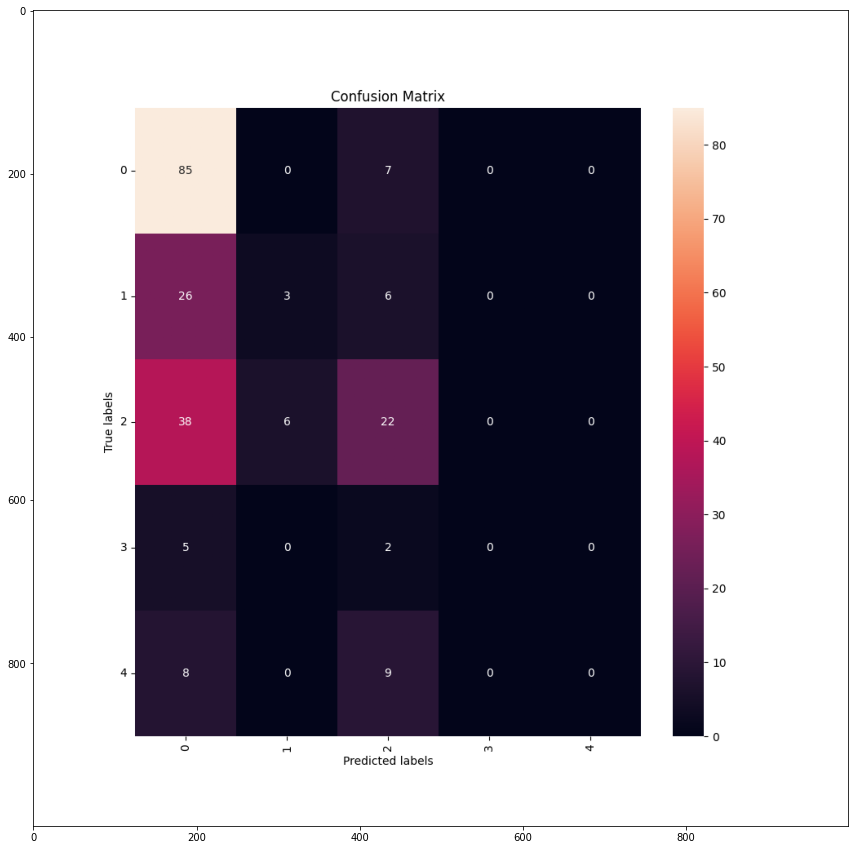

In [16]:
plt.figure(figsize = (15,15))
img = mpimg.imread('CM.png')
imgplot = plt.imshow(img)

In [14]:
!pip uninstall jarvis-tools
!pip install jarvis-tools
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import data
dft_2d = data("dft_2d")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 962 kB 7.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
atomvision 2021.10.11 requires matplotlib>=3.4.1, but you have matplotlib 3.2.2 which is incompatible.
atomvision 2021.10.11 requires pandas==1.2.4, but you have pandas 1.3.5 which is incompatible.
atomvision 2021.10.11 requires scipy>=1.6.3, but you have scipy 1.4.1 which is incompatible.
Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 8.20M/8.20M [00:01<00:00, 6.29MiB/s]


Loading the zipfile...
Loading completed.


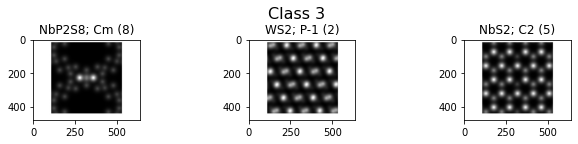

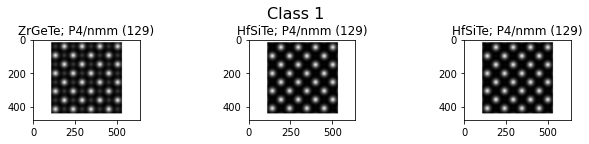

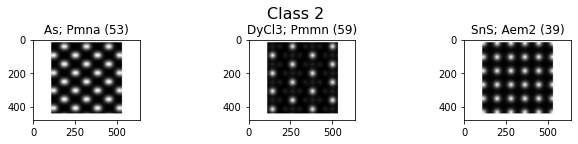

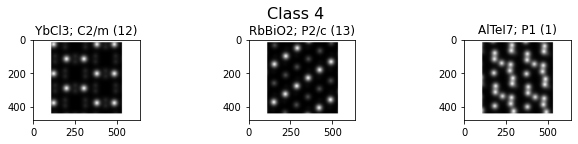

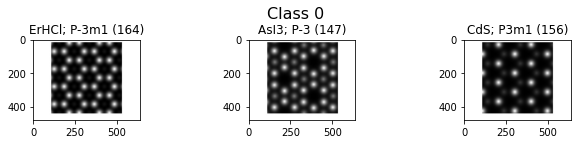

In [18]:
%matplotlib inline
for cls in os.listdir(test_folder):
  fig, ax = plt.subplots(1,3, figsize = (9,2))
  fig.tight_layout(w_pad = 2)
  fig.subplots_adjust(top=0.75)
  fig.suptitle('Class {}'.format(cls), fontsize=16)
  i = 1
  for img in os.listdir(test_folder + cls)[:3]:
    plt.subplot(1,3,i)
    plt.imshow(plt.imread(test_folder + cls + "/" + img))
    start = img.find('JVASP')
    end = img.find('.jpg')
    jid = img[start:end]
    entry = next(j for j in dft_2d if j["jid"] == jid)
    atoms = Atoms.from_dict(entry["atoms"])
    comp = atoms.composition.reduced_formula
    spg = atoms.spacegroup()
    plt.title("{}; {}".format(comp, spg)) #Label by composition and space group.
    i = i+1
plt.show()